
# Assignment No 4c
###### *Sibt ul Hussain*
----
## Goal

Your goal in this assigment is to implement and test different variants of Random Forests.For this part you will be implementing randomized version of **Randomized Linear** weak learner based Random Forest, i.e. you will be randomly selecting a pair of  features from all set of features and than randomly selecting the parameters for a generic equation of line,i.e. $ax+by+c=0$.

## TODO: 

**Complete the child class LinearWeakLearner in file `weaklearner.py` by writing the missing code.**

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

## Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time 

In [3]:
# Create some dummy data for testing
np.random.seed(seed=99)

## Let's cook some data up for a multi-class classification problem...

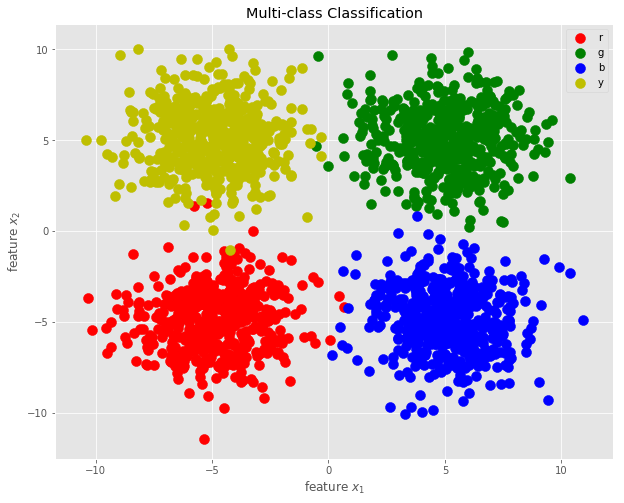

In [4]:
#generate training and testing set...by sampling from mutli-variate Gaussian
cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]] 

#create some points for the training set...
nexamples=2000
x1 = np.random.multivariate_normal(mean1,cov,nexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/4)
x3 = np.random.multivariate_normal(mean3,cov,nexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,nexamples/4)

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((nexamples/4,1)),2*np.ones((nexamples/4,1)),3*np.ones((nexamples/4,1)),4*np.ones((nexamples/4,1))))


plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='g', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='y', s=100)            



plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r','g','b','y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg',format='svg')
#create some points for the training set..

ntexamples=1000
x1 = np.random.multivariate_normal(mean1,cov,ntexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,ntexamples/4)
x3 = np.random.multivariate_normal(mean3,cov,ntexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,ntexamples/4)

Xt=np.vstack((x1,x2,x3,x4))
Yt=np.vstack((1*np.ones((ntexamples/4,1)),2*np.ones((ntexamples/4,1)),3*np.ones((ntexamples/4,1)),4*np.ones((ntexamples/4,1))))

In [5]:
import randomForest as rf

In [6]:
rfc=rf.RandomForest(weaklearner='Linear')

In [7]:
print X.shape, Y.shape

(2000, 2) (2000, 1)


In [8]:
rfc.train(X,Y)

In [9]:
len(rfc.trees)

10

In [10]:
# Training Confusion Matrix...
Yp=rfc.predict(X)
print Y.shape, len(Yp)
t.print_confusion_matrix(Yp,Y)

(2000, 1) 2000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,488,0,8,4,500
2.0,0,484,10,6,500
3.0,7,33,460,0,500
4.0,1,0,1,498,500
All,496,517,479,508,2000


In [30]:
from nose.tools import assert_greater_equal
acc = 0
count = 0
for actual,predicted in zip(Y,Yp):
    if actual != predicted:
        count+=1
result = (len(Yp) - count)/float(len(Yp))
acc = result
assert_greater_equal(acc, 0.78)
print acc

0.965


In [31]:
print np.shape(Y)

(2000, 1)


In [32]:
from nose.tools import assert_greater_equal
acc = np.sum(Y ==  np.array(Yp)) / float(Y.shape[0])

assert_greater_equal(acc, 0.78)

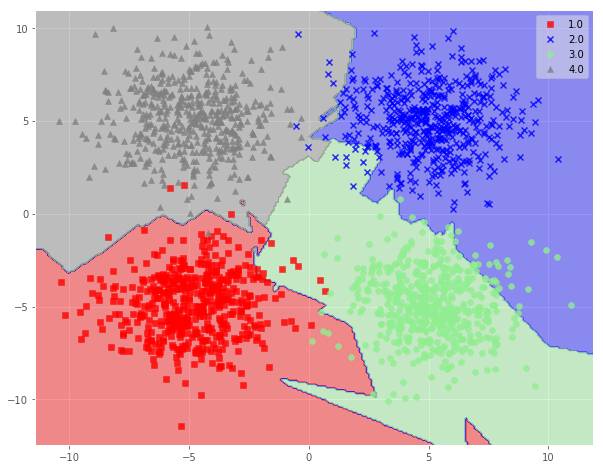

In [33]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-rlinear-10trees.svg',format='svg')

In [34]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print Y.shape, len(Ypt)
t.print_confusion_matrix(Ypt,Yt)

(2000, 1) 1000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,243,0,5,2,250
2.0,0,240,6,4,250
3.0,3,15,232,0,250
4.0,0,0,1,249,250
All,246,255,244,255,1000


In [35]:
from nose.tools import assert_greater_equal
acc = np.sum(Yt ==  np.array(Ypt)) / float(Yt.shape[0]) 

assert_greater_equal(acc, 0.78)

In [37]:
from nose.tools import assert_greater_equal
acc = 0
count = 0
for actual,predicted in zip(Y,Yp):
    if actual != predicted:
        count+=1
result = (len(Yp) - count)/float(len(Yp))
acc = result
assert_greater_equal(acc, 0.78)
print acc

0.965


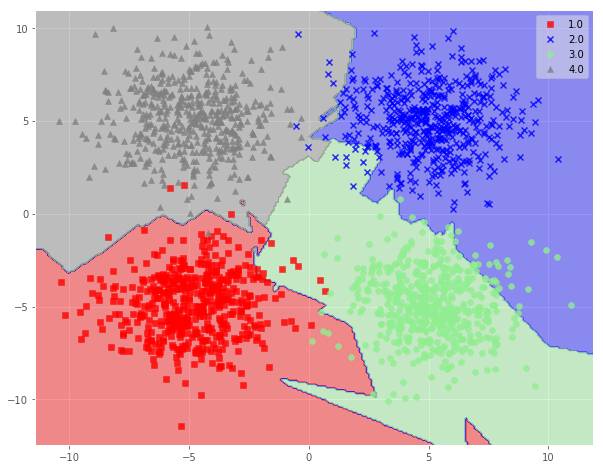

In [38]:
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('testing-boundary-rf-raa-10trees.svg',format='svg')

Automatic pdb calling has been turned ON
(10000, 2)
[1.0, 2.0, 3.0, 4.0]


tools.py:844: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(True)


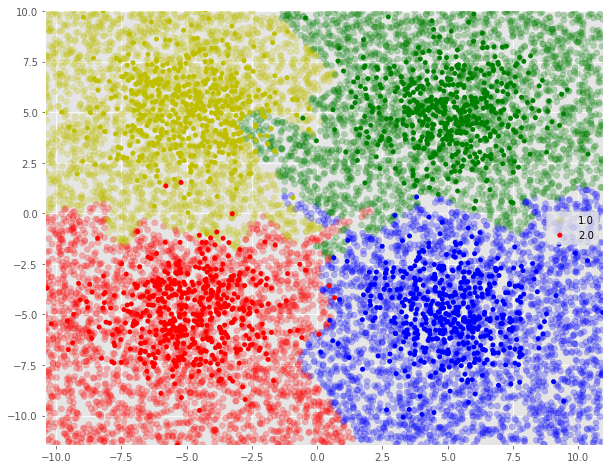

In [50]:
#plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
%pdb
t.plot_points_range(rfc,X,Y,10000)

### Lets Plot Per-Tree Decision Boundary

<function matplotlib.pyplot.tight_layout>

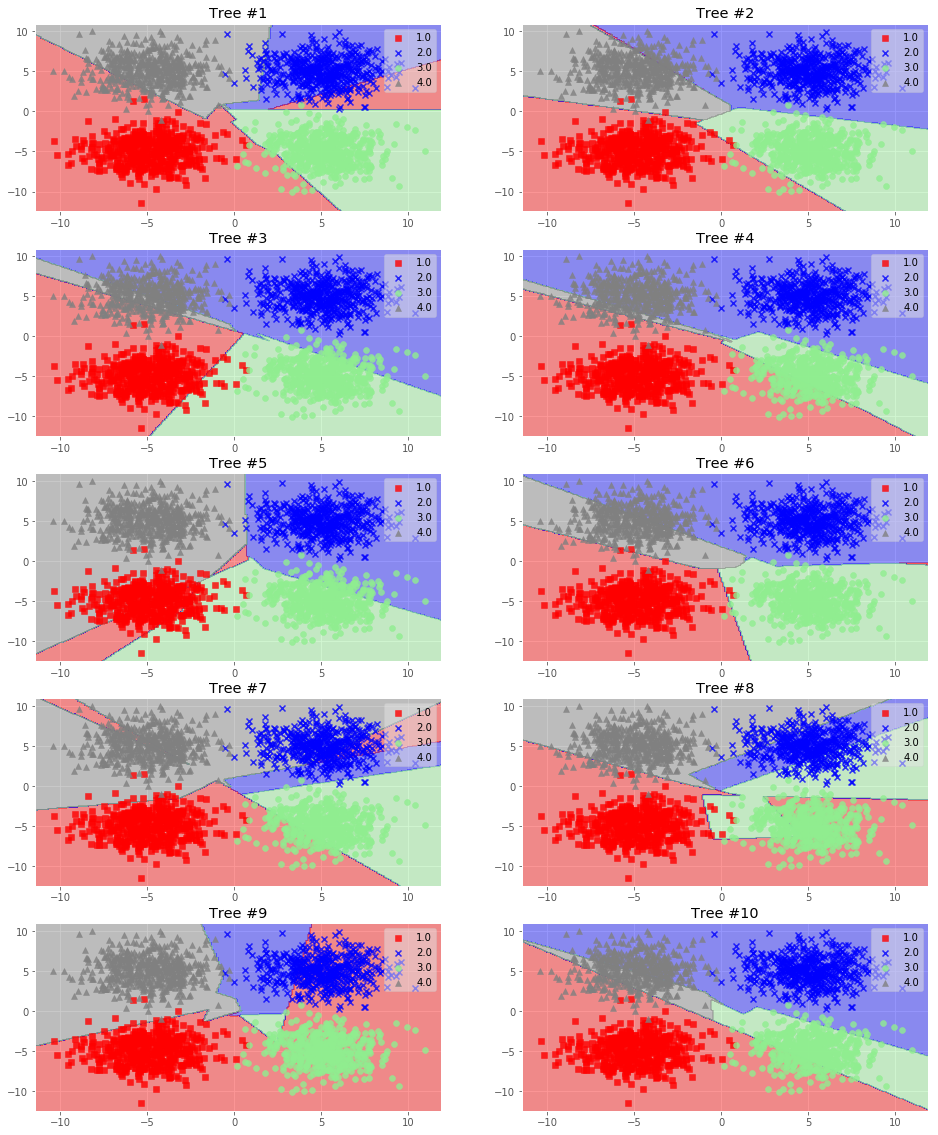

In [51]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

#### What Can You conclude

#### The descsion boundary for random forest using weak learner linear gives a good results the data can be split by using line equation so this polynomial should work as good as any higher order polynomial

## Lets Run on Nonlinear Data, The Spherical Examples...

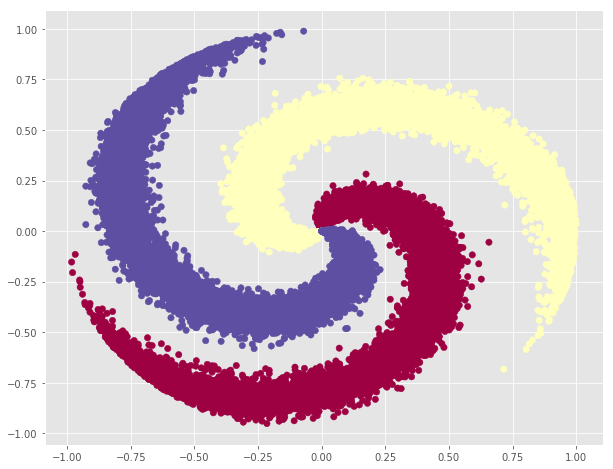

In [39]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)

In [40]:
print X.shape, Y.shape

(30000, 2) (30000,)


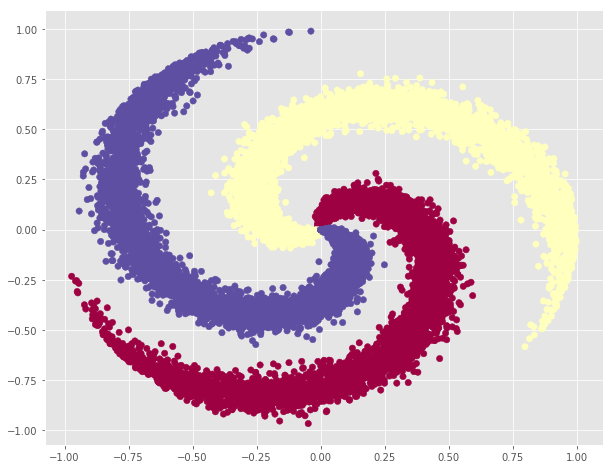

In [41]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [42]:
rfc=rf.RandomForest(weaklearner='Linear',usebagging=False,ntrees=20)
rfc.train(X,Y[:,np.newaxis])

In [43]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print Y.shape, len(Yp)
t.print_confusion_matrix(Yp,Y)

(30000,) 30000


Predicted,0,1,2,All
Actual,,,,
0,9511,34,455,10000
1,1034,8144,822,10000
2,3150,274,6576,10000
All,13695,8452,7853,30000


In [44]:
#Testing Confusion Matrix
Ypt=rfc.predict(Xtest)
print Y.shape, len(Ypt)
t.print_confusion_matrix(Ypt,Ytest)

(30000,) 15000


Predicted,0,1,2,All
Actual,,,,
0,4731,26,243,5000
1,518,4077,405,5000
2,1569,147,3284,5000
All,6818,4250,3932,15000


In [45]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp)) / float(Y.shape[0]) 

assert_greater_equal(acc, 0.78)

In [46]:
from nose.tools import assert_greater_equal
acc = 0
count = 0
for actual,predicted in zip(Y,Yp):
    if actual != predicted:
        count+=1
result = (len(Yp) - count)/float(len(Yp))
acc = result
assert_greater_equal(acc, 0.78)
print acc

0.8077


(10000, 2)
[0, 1, 2]


tools.py:844: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(True)


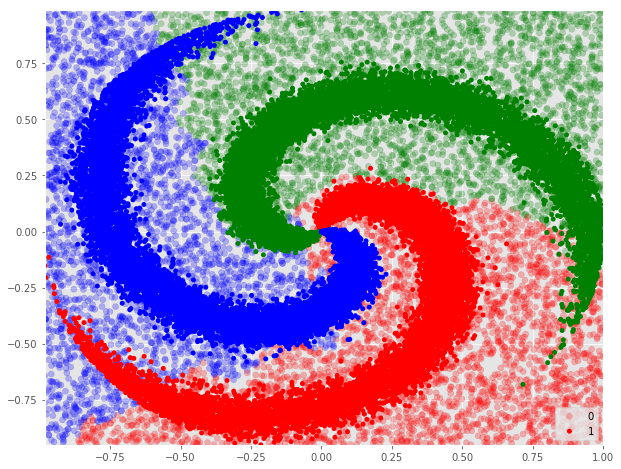

In [47]:
t.plot_points_range(rfc,X,Y)

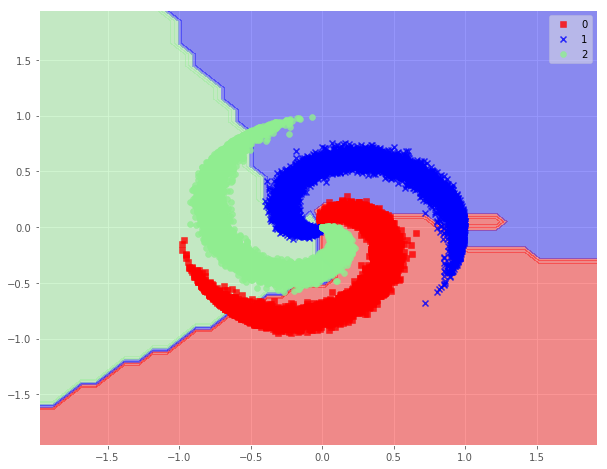

In [48]:
t.plot_decision_regions(X,Y,rfc,res=0.1)

### Lets Plot Per-Tree Decision Boundary

<function matplotlib.pyplot.tight_layout>

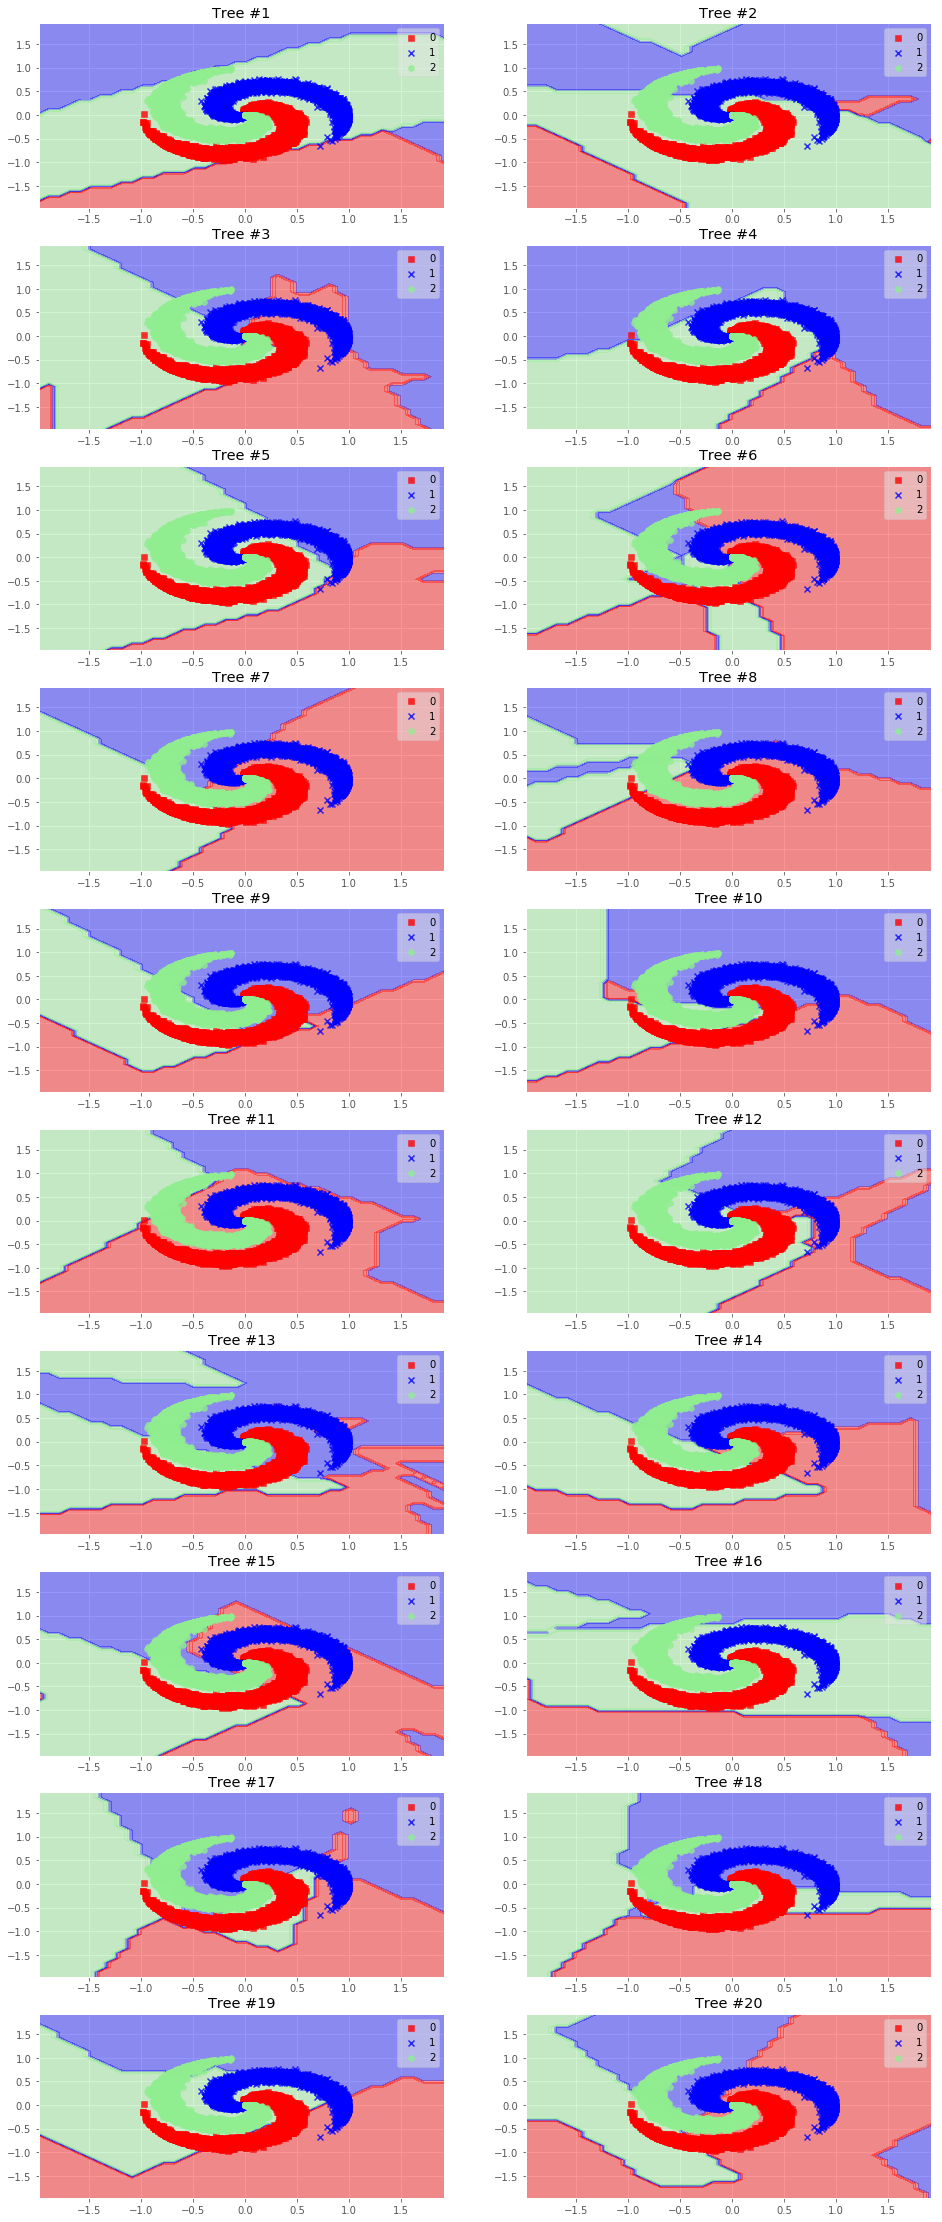

In [61]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,40))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,Y,clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

## TODO: Find Optimal Number of Trees for this data set, using cross validation...

(30000, 2) (30000,)
Trees= 1  and Accuracy= 0.7876
Trees= 2  and Accuracy= 0.671333333333
Trees= 3  and Accuracy= 0.754333333333
Trees= 4  and Accuracy= 0.7668
Trees= 5  and Accuracy= 0.6516
Trees= 6  and Accuracy= 0.795866666667
Trees= 7  and Accuracy= 0.82
Trees= 8  and Accuracy= 0.868
Trees= 9  and Accuracy= 0.7284
Trees= 10  and Accuracy= 0.811533333333
Trees= 11  and Accuracy= 0.788333333333
Trees= 12  and Accuracy= 0.793266666667
Trees= 13  and Accuracy= 0.809733333333
Trees= 14  and Accuracy= 0.766466666667
Trees= 15  and Accuracy= 0.797533333333
Trees= 16  and Accuracy= 0.839133333333
Trees= 17  and Accuracy= 0.845133333333
Trees= 18  and Accuracy= 0.8038
Trees= 19  and Accuracy= 0.854733333333
Trees= 20  and Accuracy= 0.763066666667


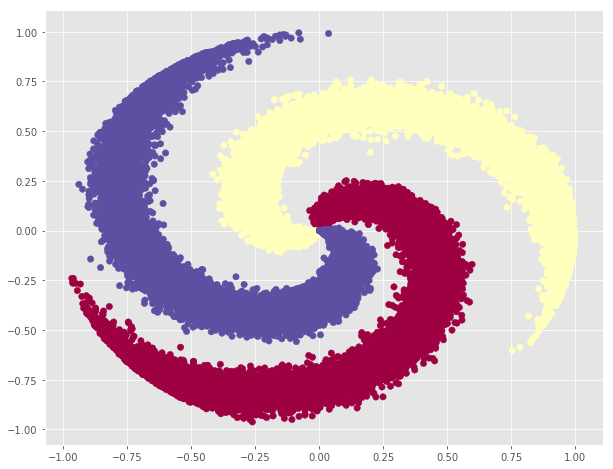

In [62]:
X,Y=t.get_spherical_data(N=10000)
print X.shape, Y.shape
Xtest,Ytest=t.get_spherical_data(N=5000)

trees = np.arange(1, 21)

for tree in trees:
    rfc=rf.RandomForest(weaklearner='Linear',usebagging=False,ntrees=tree)
    rfc.train(X,Y[:,np.newaxis])

    Ypt=rfc.predict(Xtest)

    acc = np.sum(Ytest ==  np.array(Ypt)) / float(Ytest.shape[0]) 

    print "Trees=", tree, " and Accuracy=", acc